In [1]:
import numpy as np
import time
import scipy
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline 
# mabye use notebook insted of inline

In [2]:
def test_problem(n):
    np.random.seed(1)
    A = np.random.rand(n,n)*10
    x = np.random.rand(n)*10
    b = A@x
    return A,b,x

In [3]:
size = [16,32,64]

for i in size:
    A,b,solution = test_problem(i)
    start_time = time.time()
    aprox_sol = np.linalg.solve(A,b)
    end_time = time.time()
    print(f"for size {i}, it took {np.round(end_time-start_time,7)} and the error is {np.linalg.norm(solution-aprox_sol)}")

for size 16, it took 0.0082486 and the error is 1.2437801936359966e-12
for size 32, it took 9.18e-05 and the error is 1.5771234646122261e-12
for size 64, it took 0.0002537 and the error is 9.694415848230013e-13


I was wondering if an iterative method O(n²) would be a better choice than solving the linear system O(n³). Since the system is so small and the time it takes to solve this system is so little to begin with, it seems unnecessary to implement an iterative method. If an iterative method were to be used, it would be worth checking out if the solution of one interpolation (one row in the image) could be used as the initial guess for the other columns.

In [4]:
def plot_side_by_side(obj_1,obj_2,plot_size):
    plt.figure(figsize=plot_size, dpi=80)
    plt.subplot(1,3,1)
    plt.imshow(obj_1)
    plt.title("Original")
    plt.subplot(1,3,3)
    plt.imshow(obj_2)
    plt.title(f"Ïnerp, res = {obj_2.shape}")

## RECTBIVARIATESPLINE

In [5]:
def interfunk(factor,n,obj,denosing_on_off,noise_fac_1,noise_fac_2):
    #making interpolation function
    x = np.arange(n)
    y = x 
    z = obj

    #construction interpolation function 
    interpolation_funk = scipy.interpolate.RectBivariateSpline(x,y,z)
    
    #using interpolation
    new_res = factor*n-(factor-1)
    x_new = (np.arange(new_res))/factor
    y_new = x_new
    Z_new = interpolation_funk(x_new,y_new)
    Z_new = np.round(Z_new,1)
    
    #denoising 
    if denosing_on_off:
        obj_new = np.where(Z_new>noise_fac_1,Z_new,0)
        obj_new = np.where(obj_new<noise_fac_2,obj_new,1)
    else:
        obj_new = Z_new
    
    return obj_new

## Objects

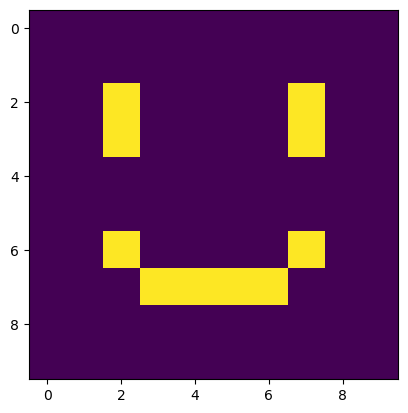

In [6]:
n = 10
smile = np.zeros((n,n))
a = 1
smile[2,2] = a
smile[3,2] = a
smile[2,7] = a
smile[3,7] = a
smile[6,2] = a
smile[6,7] = a
smile[7,3:7] = a


plt.imshow(smile)
plt.show()



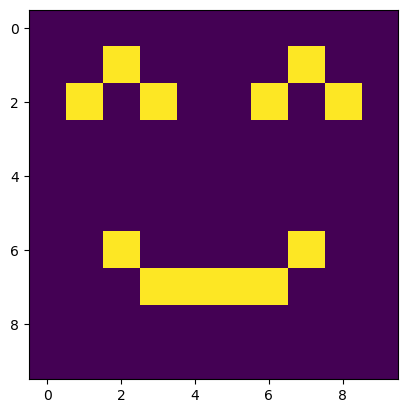

In [7]:
n = 10
happy = np.zeros((n,n))
a = 1
happy[1,2] = a
happy[1,7] = a
happy[2,1] = a
happy[2,3] = a
happy[2,6] = a
happy[2,8] = a
happy[7,3:7] = a
happy[6,2] = a
happy[6,7] = a


plt.imshow(happy)
plt.show()

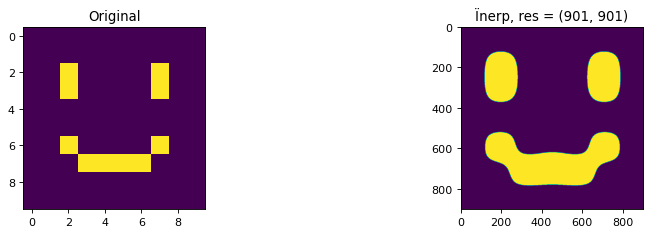

In [8]:
denosing = True
smile_new = interfunk(100,n,smile,denosing,0.2,0.1)

plot_side_by_side(smile,smile_new,(10, 6))

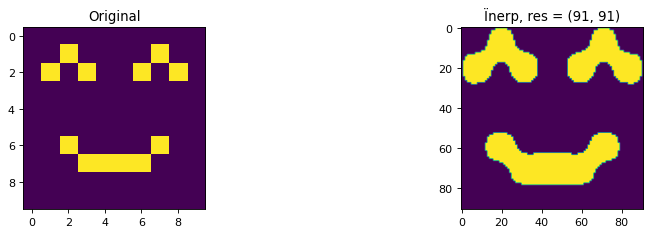

In [9]:
denosing = True
happy_new = interfunk(10,n,happy,denosing,0.2,0.1)

plot_side_by_side(happy,happy_new,(10, 6))

## Matrix constrion

In [10]:
#importing data
X = np.genfromtxt("data/test_matriser.txt", delimiter=",") # hode og hånd
X = X[~np.isnan(X)]
Y = np.genfromtxt("data/test_matriser_2.txt", delimiter=",") # hode og hånd
Y = Y[~np.isnan(Y)]


X = X.reshape(int(X.shape[0]/64),8,8)#antall,dim_1,dim_2
X = X[:,::-1,:]

Y = Y.reshape(int(Y.shape[0]/64),8,8)#antall,dim_1,dim_2
Y = Y[:,::-1,:]

In [11]:
def animated_interpolation(obj1,obj2):
    state = obj1.shape[1] >8
    array_len = obj1.shape[0]
    
    # initialization 
    zeros = np.zeros((obj1.shape[1],obj1.shape[1]))
    zeros_small = np.zeros((obj2.shape[1],obj2.shape[1]))
    ims = []
    ims2 = []
    
    # plotting
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    fig.tight_layout(pad=1)#finn noe bedre
    ax[0].set_title("Heatplot with interpolation")
    ax[1].set_title("Heatplot with no interpolation")

    # animating
    for i in range(array_len):
        if state :
            im = ax[0].imshow(obj1[i], animated=True,interpolation='none')
            im2 = ax[1].imshow(obj2[i], animated=True,interpolation='none')
        else:
            im = ax[0].imshow(obj1[i], animated=True,interpolation='bicubic')
            im2 = ax[1].imshow(obj2[i], animated=True,interpolation='none')
            
        if i == 0:
            im = ax[0].imshow(zeros)
            im2 = ax[1].imshow(zeros) 
            
        ims.append([im])
        ims2.append([im2])
        
    cax = plt.axes([0.06, 0.2, 0.9, 0.05])
    plt.colorbar(im,cax=cax,orientation = "horizontal")
    
    ani = animation.ArtistAnimation(fig, ims, interval=500, #interval = how long frame last
                                    blit=True,
                                    repeat_delay=1000)
    
    ani2 = animation.ArtistAnimation(fig, ims2, interval=500, #interval = how long frame last
                                    blit=True,
                                    repeat_delay=1000)
    return ani,ani2

# Stored feed matplotlib interpolation

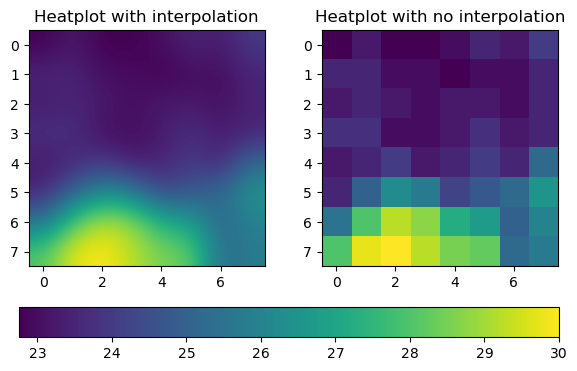

In [12]:
outer_ani,outer_ani2 = animated_interpolation(Y,Y)
outer_ani.save("interp_matplotlib.mp4")
outer_ani2.save("no_interp_matplotlib.mp4")
plt.show()

## Stored feed scipy interpolation

In [26]:
def interp_data(interp_fac,obj):
    res_size = 8
    array_len = obj.shape[0]

    new_res = interp_fac*(res_size-1)+1
    new_object_array = np.zeros((array_len,new_res,new_res))
    
    for i in range(array_len):
        new_object_array[i,:,:] = interfunk(interp_fac,res_size,obj[i],False,0,0)
    return new_object_array

In [27]:
interp_fac = 2
new_object_array = interp_data(interp_fac,Y)

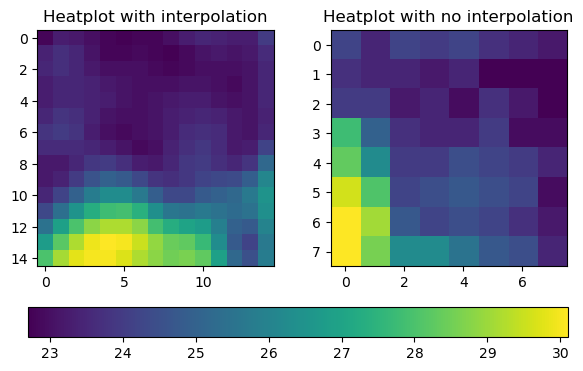

In [28]:
outer_ani,outer_ani2  = animated_interpolation(new_object_array,Y)
outer_ani.save("scipy_interp_factor2.mp4")
plt.show()